In [2]:
import pandas as pd
import string
import sys,csv,re
import matplotlib.pyplot as plt
import dataframe_image as dfi
import sys
import os
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
tweets_mpox = pd.read_csv('monkeypox.csv')
tweets_mpox.head(5)

,Datetime,Tweet Id,Text,Username,Like Count,Reply Count,RetweetCount,Language,Hashtags,Source
0,2022-09-30 23:57:18+00:00,1575998250905040000,American Government: ‘The #monkeypox virus spr...,johnOkillens,0.0,0.0,1.0,en,['monkeypox'],"<a href=""http://twitter.com/#!/download/ipad"" ..."
1,2022-09-30 23:57:07+00:00,1575998207032630000,They stole my sons catalytic converter I hope ...,LordotDragons,6.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
2,2022-09-30 23:55:14+00:00,1575997730500970000,"In response to #monkeypox, @POTUS requested th...",LALGBTCenter,8.0,1.0,2.0,en,['monkeypox'],"<a href=""https://mobile.twitter.com"" rel=""nofo..."
3,2022-09-30 23:54:34+00:00,1575997561797680000,#Enfermeiros infectados após coleta de amostra...,AlagoasReal,1.0,0.0,0.0,pt,"['Enfermeiros', 'monkeypox']","<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,2022-09-30 23:54:01+00:00,1575997424266420000,Monkey pox just up and disappeared,_sewjazzy,0.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r..."


In [4]:
tweets_mpox.shape

(689935, 10)

In [58]:
tweets_mpox.Text[7]

'Am I the only one who didn’t get the monkey pox scar ?! I do not have a single puncture mark.'

In [5]:
mpox_en = tweets_mpox[tweets_mpox['Language']=='en']
mpox_en.shape

(590468, 10)

In [6]:
mpox_en.isna().sum()

Datetime             0
Tweet Id             0
Text                 0
Username             0
Like Count           0
Reply Count          0
RetweetCount         0
Language             0
Hashtags        398740
Source               0
dtype: int64

In [7]:
mpox_en.reset_index(drop=True)

,Datetime,Tweet Id,Text,Username,Like Count,Reply Count,RetweetCount,Language,Hashtags,Source
0,2022-09-30 23:57:18+00:00,1575998250905040000,American Government: ‘The #monkeypox virus spr...,johnOkillens,0.0,0.0,1.0,en,['monkeypox'],"<a href=""http://twitter.com/#!/download/ipad"" ..."
1,2022-09-30 23:57:07+00:00,1575998207032630000,They stole my sons catalytic converter I hope ...,LordotDragons,6.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
2,2022-09-30 23:55:14+00:00,1575997730500970000,"In response to #monkeypox, @POTUS requested th...",LALGBTCenter,8.0,1.0,2.0,en,['monkeypox'],"<a href=""https://mobile.twitter.com"" rel=""nofo..."
3,2022-09-30 23:54:01+00:00,1575997424266420000,Monkey pox just up and disappeared,_sewjazzy,0.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
4,2022-09-30 23:53:28+00:00,1575997287804690000,@LovesCanada8 I hope it's not as scary as monk...,ohwaldie,2.0,0.0,0.0,en,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
...,...,...,...,...,...,...,...,...,...,...
590463,2022-05-07 13:19:03+00:00,1522929001958090000,Monkeypox \n\nMonkey. Pox.\n\nAt least TRY and...,DejaRu22,59.0,2.0,5.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r..."
590464,2022-05-07 13:16:03+00:00,1522928245557150000,Did Bill Gates not bang on about a monkey pox ...,RebornShelo,1.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/android"" ..."
590465,2022-05-07 13:03:25+00:00,1522925067881130000,HOW MANY ILLEGAL BOAT MEN ENTERING THE UK HAVE...,The_UK_NeedsYou,4.0,0.0,1.0,en,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
590466,2022-05-07 12:53:50+00:00,1522922658513680000,@TheSun Monkey pox sounds like a name of an up...,Scorchio11,0.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r..."


In [8]:
# Using Lemmatizer as it converts words to its root meaning rather than just removing the suffices

In [9]:
lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')

def preprocess(text, lemmatize=True):
    # Remove url, change to lower case
    text = re.sub('http\S+|www\S+', ' ', str(text).lower())
    # remove picture links 
    text = re.sub('pic\S*\s?', ' ', text)
    # remove all handles
    text = re.sub('@\S+', ' ', text)
    # remove special characters
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    #remove all multiple white spaces 
    text = re.sub('[\s]+', ' ', text).strip()
    
    text = ' '.join([word for word in text.split() if word not in (stop)])
    
    if lemmatize:
        word_list = nltk.word_tokenize(text)
        lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
        return lemmatized_output#" ".join(tokens)
    else:
        return text



In [10]:
mpox_en['text_cleaned'] = mpox_en['Text'].apply(lambda x: preprocess(x))

/var/folders/8s/p2g261dd1tjdybwdlkvch4lh0000gn/T/ipykernel_16792/2814778392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpox_en['text_cleaned'] = mpox_en['Text'].apply(lambda x: preprocess(x))


In [11]:
mpox_en.head()

,Datetime,Tweet Id,Text,Username,Like Count,Reply Count,RetweetCount,Language,Hashtags,Source,text_cleaned
0,2022-09-30 23:57:18+00:00,1575998250905040000,American Government: ‘The #monkeypox virus spr...,johnOkillens,0.0,0.0,1.0,en,['monkeypox'],"<a href=""http://twitter.com/#!/download/ipad"" ...",american government monkeypox virus spread slo...
1,2022-09-30 23:57:07+00:00,1575998207032630000,They stole my sons catalytic converter I hope ...,LordotDragons,6.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stole son catalytic converter hope people ever...
2,2022-09-30 23:55:14+00:00,1575997730500970000,"In response to #monkeypox, @POTUS requested th...",LALGBTCenter,8.0,1.0,2.0,en,['monkeypox'],"<a href=""https://mobile.twitter.com"" rel=""nofo...",response monkeypox requested congress allocate...
4,2022-09-30 23:54:01+00:00,1575997424266420000,Monkey pox just up and disappeared,_sewjazzy,0.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",monkey pox disappeared
5,2022-09-30 23:53:28+00:00,1575997287804690000,@LovesCanada8 I hope it's not as scary as monk...,ohwaldie,2.0,0.0,0.0,en,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",hope scary monkey pox


In [12]:
def clean_list(list_):
    if isinstance(list_, float):
        return list_
    list_ = list_.replace("', '", " ")
    list_ = list_.replace("['", "")
    list_ = list_.replace("']", "")
    list_ = list_.lower()
    return list_

def count_list(list_):
    if isinstance(list_, float):
        return 0
    return len(list_.split())

mpox_en['Hashtags'] = mpox_en['Hashtags'].apply(clean_list)
mpox_en['Hashtag_count'] = mpox_en['Hashtags'].apply(count_list)

mpox_en



/var/folders/8s/p2g261dd1tjdybwdlkvch4lh0000gn/T/ipykernel_16792/37827077.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpox_en['Hashtags'] = mpox_en['Hashtags'].apply(clean_list)
/var/folders/8s/p2g261dd1tjdybwdlkvch4lh0000gn/T/ipykernel_16792/37827077.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpox_en['Hashtag_count'] = mpox_en['Hashtags'].apply(count_list)


,Datetime,Tweet Id,Text,Username,Like Count,Reply Count,RetweetCount,Language,Hashtags,Source,text_cleaned,Hashtag_count
0,2022-09-30 23:57:18+00:00,1575998250905040000,American Government: ‘The #monkeypox virus spr...,johnOkillens,0.0,0.0,1.0,en,monkeypox,"<a href=""http://twitter.com/#!/download/ipad"" ...",american government monkeypox virus spread slo...,1
1,2022-09-30 23:57:07+00:00,1575998207032630000,They stole my sons catalytic converter I hope ...,LordotDragons,6.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stole son catalytic converter hope people ever...,0
2,2022-09-30 23:55:14+00:00,1575997730500970000,"In response to #monkeypox, @POTUS requested th...",LALGBTCenter,8.0,1.0,2.0,en,monkeypox,"<a href=""https://mobile.twitter.com"" rel=""nofo...",response monkeypox requested congress allocate...,1
4,2022-09-30 23:54:01+00:00,1575997424266420000,Monkey pox just up and disappeared,_sewjazzy,0.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",monkey pox disappeared,0
5,2022-09-30 23:53:28+00:00,1575997287804690000,@LovesCanada8 I hope it's not as scary as monk...,ohwaldie,2.0,0.0,0.0,en,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",hope scary monkey pox,0
...,...,...,...,...,...,...,...,...,...,...,...,...
689930,2022-05-07 13:19:03+00:00,1522929001958090000,Monkeypox \n\nMonkey. Pox.\n\nAt least TRY and...,DejaRu22,59.0,2.0,5.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",monkeypox monkey pox least try make seem half ...,0
689931,2022-05-07 13:16:03+00:00,1522928245557150000,Did Bill Gates not bang on about a monkey pox ...,RebornShelo,1.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/android"" ...",bill gate bang monkey pox outbreak last year,0
689932,2022-05-07 13:03:25+00:00,1522925067881130000,HOW MANY ILLEGAL BOAT MEN ENTERING THE UK HAVE...,The_UK_NeedsYou,4.0,0.0,1.0,en,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",many illegal boat men entering uk exposed monk...,0
689933,2022-05-07 12:53:50+00:00,1522922658513680000,@TheSun Monkey pox sounds like a name of an up...,Scorchio11,0.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",monkey pox sound like name upcoming liverpudli...,0


In [13]:
#converting the datetime64[ns, UTC] format to normal datetime.

mpox_en['Datetime'] = pd.to_datetime(mpox_en.Datetime).dt.tz_localize(None)
mpox_en

/var/folders/8s/p2g261dd1tjdybwdlkvch4lh0000gn/T/ipykernel_16792/1441591475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpox_en['Datetime'] = pd.to_datetime(mpox_en.Datetime).dt.tz_localize(None)


,Datetime,Tweet Id,Text,Username,Like Count,Reply Count,RetweetCount,Language,Hashtags,Source,text_cleaned,Hashtag_count
0,2022-09-30 23:57:18,1575998250905040000,American Government: ‘The #monkeypox virus spr...,johnOkillens,0.0,0.0,1.0,en,monkeypox,"<a href=""http://twitter.com/#!/download/ipad"" ...",american government monkeypox virus spread slo...,1
1,2022-09-30 23:57:07,1575998207032630000,They stole my sons catalytic converter I hope ...,LordotDragons,6.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stole son catalytic converter hope people ever...,0
2,2022-09-30 23:55:14,1575997730500970000,"In response to #monkeypox, @POTUS requested th...",LALGBTCenter,8.0,1.0,2.0,en,monkeypox,"<a href=""https://mobile.twitter.com"" rel=""nofo...",response monkeypox requested congress allocate...,1
4,2022-09-30 23:54:01,1575997424266420000,Monkey pox just up and disappeared,_sewjazzy,0.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",monkey pox disappeared,0
5,2022-09-30 23:53:28,1575997287804690000,@LovesCanada8 I hope it's not as scary as monk...,ohwaldie,2.0,0.0,0.0,en,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",hope scary monkey pox,0
...,...,...,...,...,...,...,...,...,...,...,...,...
689930,2022-05-07 13:19:03,1522929001958090000,Monkeypox \n\nMonkey. Pox.\n\nAt least TRY and...,DejaRu22,59.0,2.0,5.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",monkeypox monkey pox least try make seem half ...,0
689931,2022-05-07 13:16:03,1522928245557150000,Did Bill Gates not bang on about a monkey pox ...,RebornShelo,1.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/android"" ...",bill gate bang monkey pox outbreak last year,0
689932,2022-05-07 13:03:25,1522925067881130000,HOW MANY ILLEGAL BOAT MEN ENTERING THE UK HAVE...,The_UK_NeedsYou,4.0,0.0,1.0,en,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",many illegal boat men entering uk exposed monk...,0
689933,2022-05-07 12:53:50,1522922658513680000,@TheSun Monkey pox sounds like a name of an up...,Scorchio11,0.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",monkey pox sound like name upcoming liverpudli...,0


In [14]:
mpox_en.reset_index(drop=True)

,Datetime,Tweet Id,Text,Username,Like Count,Reply Count,RetweetCount,Language,Hashtags,Source,text_cleaned,Hashtag_count
0,2022-09-30 23:57:18,1575998250905040000,American Government: ‘The #monkeypox virus spr...,johnOkillens,0.0,0.0,1.0,en,monkeypox,"<a href=""http://twitter.com/#!/download/ipad"" ...",american government monkeypox virus spread slo...,1
1,2022-09-30 23:57:07,1575998207032630000,They stole my sons catalytic converter I hope ...,LordotDragons,6.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stole son catalytic converter hope people ever...,0
2,2022-09-30 23:55:14,1575997730500970000,"In response to #monkeypox, @POTUS requested th...",LALGBTCenter,8.0,1.0,2.0,en,monkeypox,"<a href=""https://mobile.twitter.com"" rel=""nofo...",response monkeypox requested congress allocate...,1
3,2022-09-30 23:54:01,1575997424266420000,Monkey pox just up and disappeared,_sewjazzy,0.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",monkey pox disappeared,0
4,2022-09-30 23:53:28,1575997287804690000,@LovesCanada8 I hope it's not as scary as monk...,ohwaldie,2.0,0.0,0.0,en,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",hope scary monkey pox,0
...,...,...,...,...,...,...,...,...,...,...,...,...
590463,2022-05-07 13:19:03,1522929001958090000,Monkeypox \n\nMonkey. Pox.\n\nAt least TRY and...,DejaRu22,59.0,2.0,5.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",monkeypox monkey pox least try make seem half ...,0
590464,2022-05-07 13:16:03,1522928245557150000,Did Bill Gates not bang on about a monkey pox ...,RebornShelo,1.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/android"" ...",bill gate bang monkey pox outbreak last year,0
590465,2022-05-07 13:03:25,1522925067881130000,HOW MANY ILLEGAL BOAT MEN ENTERING THE UK HAVE...,The_UK_NeedsYou,4.0,0.0,1.0,en,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",many illegal boat men entering uk exposed monk...,0
590466,2022-05-07 12:53:50,1522922658513680000,@TheSun Monkey pox sounds like a name of an up...,Scorchio11,0.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",monkey pox sound like name upcoming liverpudli...,0


In [59]:
mpox_en.text_cleaned[7]

'one get monkey pox scar single puncture mark'

In [37]:
#using stop.append in removing the search query words to get more insight on the most important words
new_mpox = ('monkeypox', 'monkey pox', 'monkey', 'pox monkey', 'vaccine', 'virus','amp',
           'monkeypoxvirus', 'monkeypoxvaccine', 'monkeypox vaccine', 'pox', 'moneypox')
stop.extend(new_mpox)


In [38]:
stop[-10:]

['monkey',
 'pox monkey',
 'vaccine',
 'virus',
 'amp',
 'monkeypoxvirus',
 'monkeypoxvaccine',
 'monkeypox vaccine',
 'pox',
 'moneypox']

In [39]:
#Extracting the query related words from tweets 
mpox_en['text_cleared'] = mpox_en['text_cleaned'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))

mpox_en.head()



/var/folders/8s/p2g261dd1tjdybwdlkvch4lh0000gn/T/ipykernel_16792/3548389800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpox_en['text_cleared'] = mpox_en['text_cleaned'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))


,Datetime,Tweet Id,Text,Username,Like Count,Reply Count,RetweetCount,Language,Hashtags,Source,text_cleaned,Hashtag_count,text_cleared,TextLen
0,2022-09-30 23:57:18,1575998250905040000,American Government: ‘The #monkeypox virus spr...,johnOkillens,0.0,0.0,1.0,en,monkeypox,"<a href=""http://twitter.com/#!/download/ipad"" ...",american government monkeypox virus spread slo...,1,american government spread slowing foresee fin...,182
1,2022-09-30 23:57:07,1575998207032630000,They stole my sons catalytic converter I hope ...,LordotDragons,6.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stole son catalytic converter hope people ever...,0,stole son catalytic converter hope people ever...,94
2,2022-09-30 23:55:14,1575997730500970000,"In response to #monkeypox, @POTUS requested th...",LALGBTCenter,8.0,1.0,2.0,en,monkeypox,"<a href=""https://mobile.twitter.com"" rel=""nofo...",response monkeypox requested congress allocate...,1,response requested congress allocate 4 5 billi...,170
4,2022-09-30 23:54:01,1575997424266420000,Monkey pox just up and disappeared,_sewjazzy,0.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",monkey pox disappeared,0,disappeared,11
5,2022-09-30 23:53:28,1575997287804690000,@LovesCanada8 I hope it's not as scary as monk...,ohwaldie,2.0,0.0,0.0,en,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",hope scary monkey pox,0,hope scary,10


In [40]:
#Creating a dataframe of tweets more than 7 characters which in turn excludes missing values

mpox_en['TextLen'] = mpox_en.text_cleared.apply(lambda x:len(str(x)))
mp1 = mpox_en[mpox_en.TextLen>=8]
mp1.head()

/var/folders/8s/p2g261dd1tjdybwdlkvch4lh0000gn/T/ipykernel_16792/2964793976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpox_en['TextLen'] = mpox_en.text_cleared.apply(lambda x:len(str(x)))


,Datetime,Tweet Id,Text,Username,Like Count,Reply Count,RetweetCount,Language,Hashtags,Source,text_cleaned,Hashtag_count,text_cleared,TextLen
0,2022-09-30 23:57:18,1575998250905040000,American Government: ‘The #monkeypox virus spr...,johnOkillens,0.0,0.0,1.0,en,monkeypox,"<a href=""http://twitter.com/#!/download/ipad"" ...",american government monkeypox virus spread slo...,1,american government spread slowing foresee fin...,182
1,2022-09-30 23:57:07,1575998207032630000,They stole my sons catalytic converter I hope ...,LordotDragons,6.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stole son catalytic converter hope people ever...,0,stole son catalytic converter hope people ever...,94
2,2022-09-30 23:55:14,1575997730500970000,"In response to #monkeypox, @POTUS requested th...",LALGBTCenter,8.0,1.0,2.0,en,monkeypox,"<a href=""https://mobile.twitter.com"" rel=""nofo...",response monkeypox requested congress allocate...,1,response requested congress allocate 4 5 billi...,170
4,2022-09-30 23:54:01,1575997424266420000,Monkey pox just up and disappeared,_sewjazzy,0.0,0.0,0.0,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",monkey pox disappeared,0,disappeared,11
5,2022-09-30 23:53:28,1575997287804690000,@LovesCanada8 I hope it's not as scary as monk...,ohwaldie,2.0,0.0,0.0,en,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",hope scary monkey pox,0,hope scary,10


In [41]:
print (len(mpox_en), len(mp1))

print (len(mpox_en) - len(mp1))

590468 546528
43940


In [42]:
#verify the missing values in the dataframe

mp1.isna().sum()

Datetime              0
Tweet Id              0
Text                  0
Username              0
Like Count            0
Reply Count           0
RetweetCount          0
Language              0
Hashtags         358507
Source                0
text_cleaned          0
Hashtag_count         0
text_cleared          0
TextLen               0
dtype: int64

In [43]:
for i in mp1.text_cleared:
    #print(i, type(i), len(i))
    if len(i)<8:
        print(i)
    #break


### Exploratory Data Analysis

In [44]:
mp1.isnull().sum(axis = 0)

Datetime              0
Tweet Id              0
Text                  0
Username              0
Like Count            0
Reply Count           0
RetweetCount          0
Language              0
Hashtags         358507
Source                0
text_cleaned          0
Hashtag_count         0
text_cleared          0
TextLen               0
dtype: int64

In [45]:
mp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546528 entries, 0 to 689934
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Datetime       546528 non-null  datetime64[ns]
 1   Tweet Id       546528 non-null  int64         
 2   Text           546528 non-null  object        
 3   Username       546528 non-null  object        
 4   Like Count     546528 non-null  float64       
 5   Reply Count    546528 non-null  float64       
 6   RetweetCount   546528 non-null  float64       
 7   Language       546528 non-null  object        
 8   Hashtags       188021 non-null  object        
 9   Source         546528 non-null  object        
 10  text_cleaned   546528 non-null  object        
 11  Hashtag_count  546528 non-null  int64         
 12  text_cleared   546528 non-null  object        
 13  TextLen        546528 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(7

In [46]:
mp1.describe()

,Tweet Id,Like Count,Reply Count,RetweetCount,Hashtag_count,TextLen
count,5.465280e+05,546528.000000,546528.000000,546528.000000,546528.000000,546528.000000
mean,1.547073e+18,11.642516,0.944557,2.628806,0.902898,70.290452
std,1.271695e+16,524.357321,18.550226,98.136249,1.972040,49.698672
min,1.522922e+18,0.000000,0.000000,0.000000,0.000000,8.000000
25%,1.533763e+18,0.000000,0.000000,0.000000,0.000000,29.000000
50%,1.551623e+18,1.000000,0.000000,0.000000,0.000000,55.000000
75%,1.555349e+18,2.000000,1.000000,0.000000,1.000000,105.000000
max,1.575998e+18,165900.000000,6684.000000,28587.000000,34.000000,265.000000


In [47]:
mp1['RetweetCount'].value_counts()

0.0        435061
1.0         53555
2.0         18493
3.0          9328
4.0          5847
            ...  
522.0           1
20202.0         1
432.0           1
18167.0         1
417.0           1
Name: RetweetCount, Length: 722, dtype: int64

In [48]:
mp1['Like Count'].value_counts()

0.0        272149
1.0        108813
2.0         46683
3.0         25640
4.0         16405
            ...  
1572.0          1
1651.0          1
11337.0         1
993.0           1
2568.0          1
Name: Like Count, Length: 1446, dtype: int64

In [49]:
mp1['Reply Count'].value_counts()

0.0      394871
1.0      103873
2.0       23323
3.0        8217
4.0        4096
          ...  
293.0         1
246.0         1
549.0         1
482.0         1
618.0         1
Name: Reply Count, Length: 377, dtype: int64

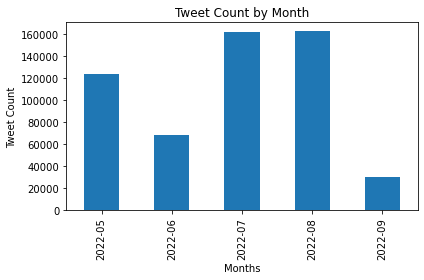

In [50]:
count_by_month = mp1['Datetime'].groupby(mp1.Datetime.dt.to_period("M")).agg('count')
ax = count_by_month.plot(kind='bar')
ax.set_xlabel("Months")
ax.set_ylabel("Tweet Count")
ax.set_title("Tweet Count by Month")
plt.tight_layout()
plt.savefig("tweet_count_by_month.png", facecolor='w')


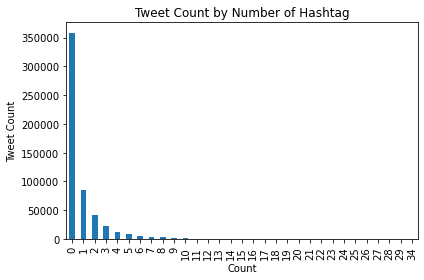

In [51]:
count_by_hashtag = mp1['Hashtag_count'].value_counts().sort_index()
ax = count_by_hashtag.plot(kind='bar')
ax.set_xlabel("Count")
ax.set_ylabel("Tweet Count")
ax.set_title("Tweet Count by Number of Hashtag")
plt.tight_layout()
plt.savefig("tweet_count_by_number_of_hashtag.png", facecolor='w')

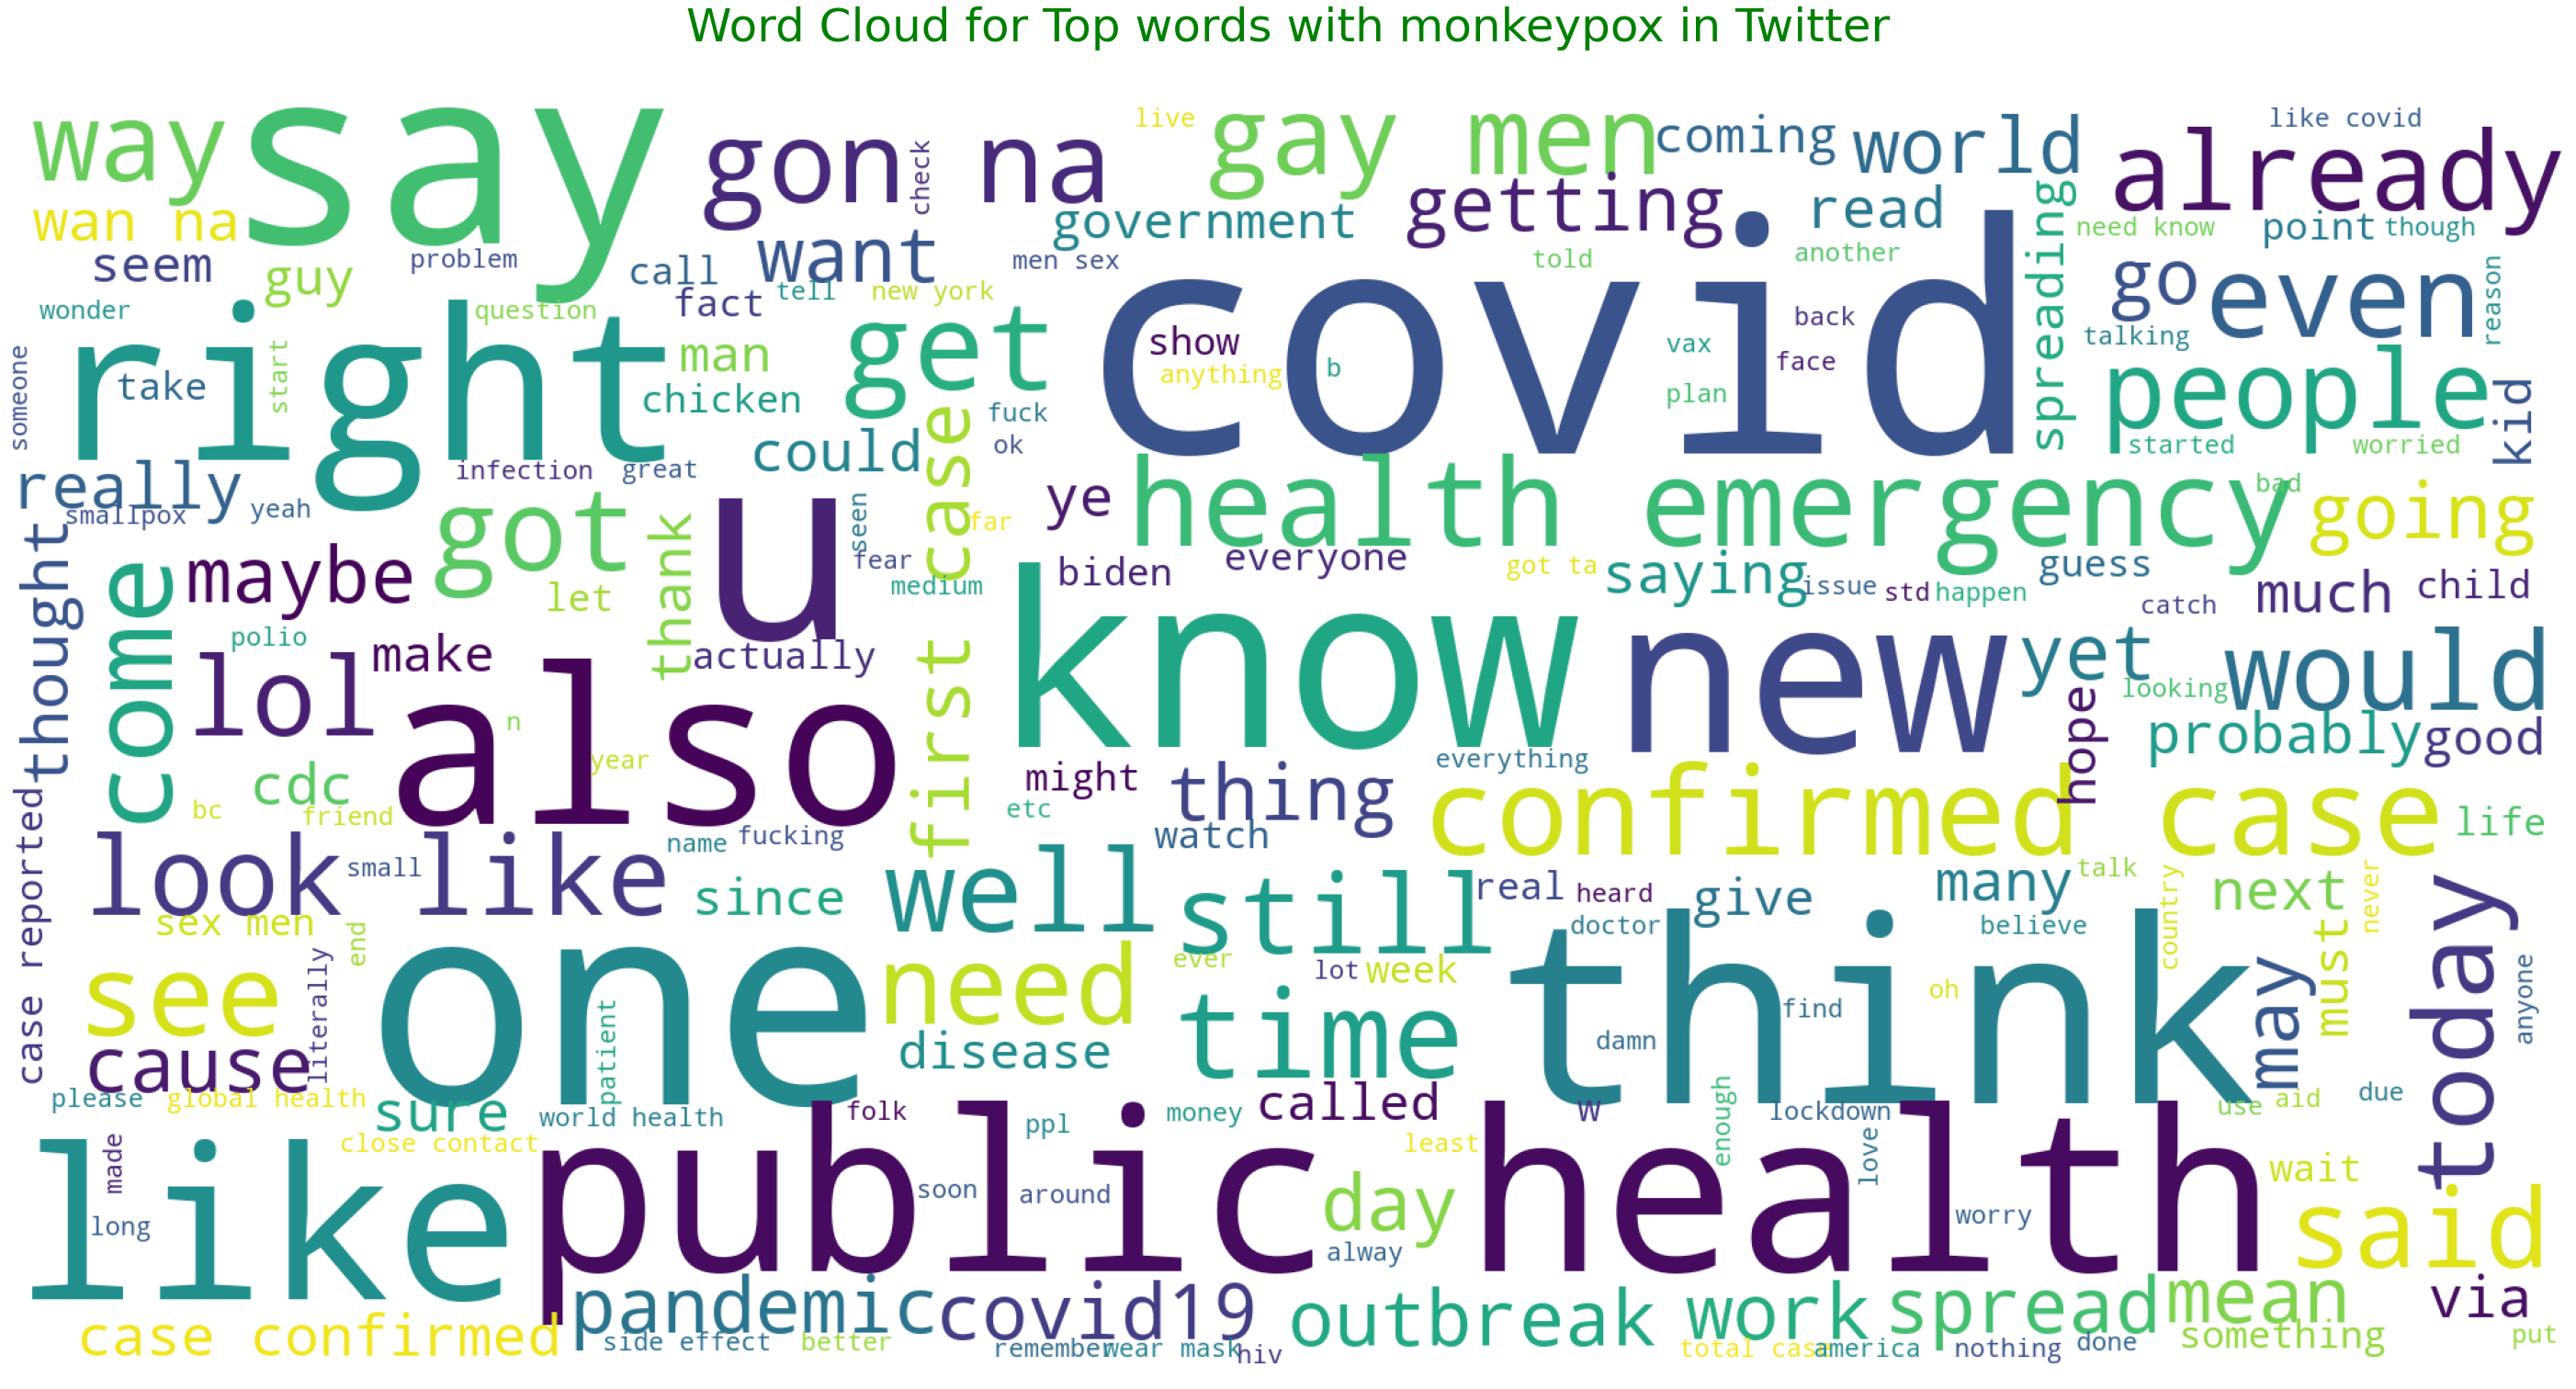

<Figure size 432x288 with 0 Axes>

In [61]:
cut_text = " ".join(mp1['text_cleared'])

word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(stop),
                    max_font_size=50,
                    scale=5,
                    random_state=1).generate(cut_text)
fig = plt.figure(1, figsize=(50,50))
plt.axis('off')
plt.title('Word Cloud for Top words with monkeypox in Twitter\n', fontsize=50,color='green')
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()
plt.savefig("Monkeypox wordcloud")

#colormap='magma',

In [53]:
mp1.to_csv('mp1.csv')